### 🕵️‍♂️ Web Scraping de Paginas Web de Amazon🛒, realizando un analisis de reseñas🌟🌟🌟🌟🌟 relacionadas al TOP 5📈 de las marcas mas vendidas.

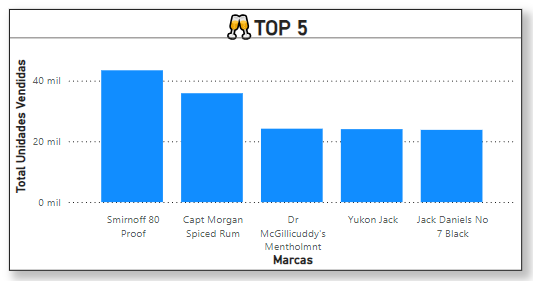

### 👩‍💻 Analisis de reseñas para la marca Smirnoff 80 Proof


In [10]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Smirnoff-Vodka-25-4-80-Proof/dp/B008XR99VS"
print("🌐 Abriendo la página del producto en Amazon...")
driver.get(url)
print("✅ Página cargada con éxito.")

# Esperar a que el botón "See more reviews" esté disponible y hacer clic
print("⏳ Esperando que el botón 'See more reviews' esté disponible...")
wait = WebDriverWait(driver, 10)
see_more_reviews_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")))
see_more_reviews_button.click()
print("📝 Botón 'See more reviews' encontrado y clicado.")

# Lista para almacenar las reseñas
reviews = []

# Bucle para extraer reseñas de varias páginas
while True:
    print("🔍 Extrayendo reseñas de la página actual...")
    # Esperar a que las reseñas se carguen
    wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'review-text-content')))

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    print(f"📄 Se han extraído {len(review_elements)} reseñas de la página actual.")

    # Intentar encontrar y hacer clic en el botón de "Siguiente página"
    try:
        next_button = driver.find_element(By.CLASS_NAME, 'a-last')
        # Verificar si el botón "Siguiente" está habilitado
        if "a-disabled" in next_button.get_attribute("class"):
            print("🏁 No hay más páginas disponibles. Finalizando scraping.")
            break
        next_button.click()
        print("➡️ Navegando a la siguiente página de reseñas...")
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue
    except Exception as e:
        print("❌ No se pudo encontrar el botón 'Siguiente página' o hubo un problema:", e)
        break  # Salir del bucle si no se encuentra el botón "Siguiente página"

# Cerrar el navegador
driver.quit()
print("🛑 Navegador cerrado.")

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('amazon_reviews_Smirnoff-Vodka.csv', index=False)

print("💾 Reseñas extraídas y guardadas en 'amazon_reviews_Smirnoff-Vodka.csv'")



🌐 Abriendo la página del producto en Amazon...
✅ Página cargada con éxito.
⏳ Esperando que el botón 'See more reviews' esté disponible...
📝 Botón 'See more reviews' encontrado y clicado.
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 10 reseñas de la página actual.
➡️ Navegando a la siguiente página de reseñas...
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 6 reseñas de la página actual.
🏁 No hay más páginas disponibles. Finalizando scraping.
🛑 Navegador cerrado.
💾 Reseñas extraídas y guardadas en 'amazon_reviews_Smirnoff-Vodka.csv'


### 👩‍💻 Analisis de reseñas para la marca Yukon Jack

In [17]:

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/-/es/Yukon-Jack-Licor-25-4-Proof/dp/B002U38SBS"
print("🌐 Abriendo la página del producto en Amazon...")
driver.get(url)
print("✅ Página cargada con éxito.")

# Lista para almacenar las reseñas
reviews = []
current_url = driver.current_url

# Bucle para extraer reseñas de varias páginas
while True:
    print("🔍 Extrayendo reseñas de la página actual...")
    # Esperar a que las reseñas se carguen
    time.sleep(2)  # Pausa para asegurarse de que las reseñas estén cargadas completamente

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    print(f"📄 Se han extraído {len(review_elements)} reseñas de la página actual.")

    # Intentar encontrar y hacer clic en el botón "See more reviews"
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")
        next_button.click()
        print("➡️ Botón 'See more reviews' encontrado y clicado.")
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue

        # Verificar si la URL ha cambiado
        new_url = driver.current_url
        if new_url == current_url:
            print("🏁 No se avanzó a una nueva página. Finalizando scraping.")
            break
        current_url = new_url
        print("➡️ Avanzando a la siguiente página de reseñas...")
        
    except Exception as e:
        print("🏁 No se pudo encontrar el botón 'See more reviews' o hubo un problema:", e)
        break  # Salir del bucle si no se encuentra el botón "See more reviews"

# Cerrar el navegador
driver.quit()
print("🛑 Navegador cerrado.")

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('yukon_jack_reviews.csv', index=False)

print("💾 Reseñas extraídas y guardadas en 'yukon_jack_reviews.csv'")


🌐 Abriendo la página del producto en Amazon...
✅ Página cargada con éxito.
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 1 reseñas de la página actual.
➡️ Botón 'See more reviews' encontrado y clicado.
➡️ Avanzando a la siguiente página de reseñas...
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 1 reseñas de la página actual.
🏁 No se pudo encontrar el botón 'See more reviews' o hubo un problema: Message: Unable to locate element: a[data-hook='see-all-reviews-link-foot']; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:511:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

🛑 Navegador cerrado.
💾 Reseñas extraídas y gua

### 👩‍💻 Analisis de reseñas para la marca Jack Daniels N7 Black

In [18]:

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'  

driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/Jack-Daniels-Tennessee-Whiskey-Proof/dp/B007C62D6Y/ref=sr_1_1_f3_0g_fs?crid=3ICTOT375YUAZ&dib=eyJ2IjoiMSJ9._-6eg2SbsHUXoRyn6Kx3X78HF90mTRV--2H9FzRQi0jGjHj071QN20LucGBJIEps.tBFkFSZ-uHHs468okTanG6JglqSpADtjdynAY81tLiM&dib_tag=se&keywords=Jack%2BDaniels%2BN7%2BBlack&qid=1724416286&s=grocery&sprefix=jack%2Bdaniels%2Bn7%2Bblack%2Cgrocery%2C488&sr=1-1&th=1"
print("🌐 Abriendo la página del producto en Amazon...")
driver.get(url)
print("✅ Página cargada con éxito.")

# Lista para almacenar las reseñas
reviews = []
current_url = driver.current_url

# Bucle para extraer reseñas de varias páginas
while True:
    print("🔍 Extrayendo reseñas de la página actual...")
    # Esperar a que las reseñas se carguen
    time.sleep(2)  # Pausa para asegurarse de que las reseñas estén cargadas completamente

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    print(f"📄 Se han extraído {len(review_elements)} reseñas de la página actual.")

    # Intentar encontrar y hacer clic en el botón "See more reviews"
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")
        next_button.click()
        print("➡️ Botón 'See more reviews' encontrado y clicado.")
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue

        # Verificar si la URL ha cambiado
        new_url = driver.current_url
        if new_url == current_url:
            print("🏁 No se avanzó a una nueva página. Finalizando scraping.")
            break
        current_url = new_url
        print("➡️ Avanzando a la siguiente página de reseñas...")
        
    except Exception as e:
        print("🏁 No se pudo encontrar el botón 'See more reviews' o hubo un problema:", e)
        break  # Salir del bucle si no se encuentra el botón "See more reviews"

# Cerrar el navegador
driver.quit()
print("🛑 Navegador cerrado.")

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('jack_daniels_reviews.csv', index=False)

print("💾 Reseñas extraídas y guardadas en 'jack_daniels_reviews.csv'")


🌐 Abriendo la página del producto en Amazon...
✅ Página cargada con éxito.
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 13 reseñas de la página actual.
➡️ Botón 'See more reviews' encontrado y clicado.
➡️ Avanzando a la siguiente página de reseñas...
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 10 reseñas de la página actual.
🏁 No se pudo encontrar el botón 'See more reviews' o hubo un problema: Message: Unable to locate element: a[data-hook='see-all-reviews-link-foot']; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:511:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

🛑 Navegador cerrado.
💾 Reseñas extraídas y g

### 👩‍💻 Analisis de reseñas para la marca Captain Morgan

In [19]:

# Configuración de Selenium
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe' 
driver = webdriver.Firefox(options=options)

# Abre la página del producto
url = "https://www.amazon.com/Captain-Morgan-Original-Spiced-Proof/dp/B007C63ZZM/ref=sr_1_2_f3_0g_fs?crid=3IHL78HGDRIPD&dib=eyJ2IjoiMSJ9.CHjPPcFO58Z6vy8IQDKKGGNElXkRG2BpBlwKt2FzbDFLh2k8N2z5Wl8gi7INoaMbUwhL0gG5FKnOyWq43GYDutsiNxmlDcQZ39nfTzqi1jQ6YnqQY98GRdfnehiyIoWZ2Yk041RNrcnetQBCNkBEqTWvRwyLF9ZUgxy10ie3Kgl3dhG9PFRZipt4ucw0KHshuYKgwlilvkJQCK9tNP6Gv_Ea3gJDoVNXCeDGTpZS2jGN2HtH2lJBIWJwET8NN-JKlPHWbB9m0XKN4oFkbimQVsXknV8FyU9NI75cCwdd0Rc.BbvhWvVWzKk00D7Cp8Y3uxJouUmNInCAaaLRdU7oS0o&dib_tag=se&keywords=captain+morgan+rum&qid=1724416776&s=grocery&sprefix=capt+morgan+rum%2Cgrocery%2C295&sr=1-2"
print("🌐 Abriendo la página del producto en Amazon...")
driver.get(url)
print("✅ Página cargada con éxito.")

# Lista para almacenar las reseñas
reviews = []
current_url = driver.current_url

# Bucle para extraer reseñas de varias páginas
while True:
    print("🔍 Extrayendo reseñas de la página actual...")
    # Esperar a que las reseñas se carguen
    time.sleep(2)  # Pausa para asegurarse de que las reseñas estén cargadas completamente

    # Extraer las reseñas en la página actual
    review_elements = driver.find_elements(By.CLASS_NAME, 'review-text-content')

    for element in review_elements:
        reviews.append(element.text)

    print(f"📄 Se han extraído {len(review_elements)} reseñas de la página actual.")

    # Intentar encontrar y hacer clic en el botón "See more reviews"
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "a[data-hook='see-all-reviews-link-foot']")
        next_button.click()
        print("➡️ Botón 'See more reviews' encontrado y clicado.")
        time.sleep(2)  # Esperar un poco para que la nueva página se cargue

        # Verificar si la URL ha cambiado
        new_url = driver.current_url
        if new_url == current_url:
            print("🏁 No se avanzó a una nueva página. Finalizando scraping.")
            break
        current_url = new_url
        print("➡️ Avanzando a la siguiente página de reseñas...")
        
    except Exception as e:
        print("🏁 No se pudo encontrar el botón 'See more reviews' o hubo un problema:", e)
        break  # Salir del bucle si no se encuentra el botón "See more reviews"

# Cerrar el navegador
driver.quit()
print("🛑 Navegador cerrado.")

# Guardar las reseñas en un DataFrame y exportar a un CSV
df = pd.DataFrame(reviews, columns=['Review'])
df.to_csv('captain_morgan_reviews.csv', index=False)

print("💾 Reseñas extraídas y guardadas en 'captain_morgan_reviews.csv'")


🌐 Abriendo la página del producto en Amazon...
✅ Página cargada con éxito.
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 3 reseñas de la página actual.
➡️ Botón 'See more reviews' encontrado y clicado.
➡️ Avanzando a la siguiente página de reseñas...
🔍 Extrayendo reseñas de la página actual...
📄 Se han extraído 3 reseñas de la página actual.
🏁 No se pudo encontrar el botón 'See more reviews' o hubo un problema: Message: Unable to locate element: a[data-hook='see-all-reviews-link-foot']; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:511:5
dom.find/</<@chrome://remote/content/shared/DOM.sys.mjs:136:16

🛑 Navegador cerrado.
💾 Reseñas extraídas y gua

### 🕵️‍♂️👩‍💻 Analisis de Smirnoff Vodka

⭕Analisis de Sentimientos

In [20]:
import pandas as pd
from textblob import TextBlob

# Cargar el archivo CSV
file_path = 'amazon_reviews_Smirnoff-Vodka.csv'
df = pd.read_csv(file_path)

# Función para obtener el sentimiento de una reseña
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimiento a cada reseña
df['Sentimiento'] = df['Review'].apply(obtener_sentimiento)

# Contar la cantidad de reseñas por tipo de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()
print(sentimiento_counts)

# Guardar el DataFrame con los sentimientos en un nuevo archivo CSV
df.to_csv('amazon_reviews_Smirnoff-Vodka_sentimientos.csv', index=False)

print("Análisis de sentimientos completado y guardado en 'amazon_reviews_Smirnoff-Vodka_sentimientos.csv'")


Sentimiento
Positivo    8
Neutral     6
Negativo    2
Name: count, dtype: int64
Análisis de sentimientos completado y guardado en 'amazon_reviews_Smirnoff-Vodka_sentimientos.csv'


⭕Analisis de temas y topicos

In [21]:
import pandas as pd
import re

# Cargar el archivo CSV
file_path = 'amazon_reviews_Smirnoff-Vodka.csv'
df = pd.read_csv(file_path)

# Definir las categorías y palabras clave
categorias = {
    'Sabor': ['sabor', 'taste', 'flavor', 'gosto'],
    'Precio': ['precio', 'price', 'preço'],
    'Entrega': ['entrega', 'delivery', 'envío'],
    'Calidad': ['calidad', 'quality', 'qualidade', 'smooth', 'good'],
    'Embalaje': ['embalaje', 'packaging', 'pack', 'bolsa', 'caja', 'box'],
    'Servicio al Cliente': ['servicio al cliente', 'customer service', 'serviço ao cliente'],
    'Aroma': ['aroma', 'smell', 'fragancia', 'fragrance'],
    'Experiencia General': ['experiencia', 'overall', 'general', 'experience', 'jack', 'JD', 'classic'],
    'Envase': ['botella', 'tapa', 'envase', 'lacre', 'bottle', 'cap'],
    'Marca': ['marca', 'brand', 'Jack', 'JD']
}

# Función para categorizar las reseñas
def categorizar_resena(resena):
    categorias_asignadas = []
    for categoria, palabras in categorias.items():
        for palabra in palabras:
            if re.search(r'\b' + re.escape(palabra) + r'\b', resena.lower()):
                categorias_asignadas.append(categoria)
                break
    return ', '.join(categorias_asignadas) if categorias_asignadas else 'Otros'

# Aplicar la categorización a cada reseña
df['Categoría'] = df['Review'].apply(categorizar_resena)

# Resumen de reseñas por categoría
resumen_por_categoria = df['Categoría'].value_counts()
print(resumen_por_categoria)

# Guardar el DataFrame con las categorías en un nuevo archivo CSV
df.to_csv('amazon_reviews_Smirnoff-Vodka_categorias.csv', index=False)

print("Análisis de temas y tópicos completado y guardado en 'amazon_reviews_Smirnoff-Vodka_categorias.csv'")


Categoría
Otros                  7
Calidad                2
Aroma                  1
Envase                 1
Experiencia General    1
Entrega                1
Embalaje, Envase       1
Precio, Calidad        1
Sabor                  1
Name: count, dtype: int64
Análisis de temas y tópicos completado y guardado en 'amazon_reviews_Smirnoff-Vodka_categorias.csv'


⭕Analisis de palabras claves y mas frecuentes

In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Descargar las stopwords de NLTK si no lo has hecho antes
nltk.download('stopwords')

# Cargar el archivo CSV
file_path = 'amazon_reviews_Smirnoff-Vodka.csv'
df = pd.read_csv(file_path)

# Combinar todas las reseñas en un solo texto
texto_completo = ' '.join(df['Review'].dropna()).lower()

# Quitar puntuación del texto
texto_completo = texto_completo.translate(str.maketrans('', '', string.punctuation))

# Dividir el texto en palabras
palabras = texto_completo.split()

# Eliminar las stopwords (palabras comunes)
stop_words = set(stopwords.words('english') + stopwords.words('spanish') + stopwords.words('portuguese'))
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

# Contar la frecuencia de cada palabra
contador_palabras = Counter(palabras_filtradas)

# Obtener las palabras más comunes
palabras_comunes = contador_palabras.most_common(20)  # Cambia el número para obtener más o menos palabras

# Mostrar las palabras más comunes
print("Las palabras más comunes son:")
for palabra, frecuencia in palabras_comunes:
    print(f"{palabra}: {frecuencia}")

# Guardar los resultados en un archivo CSV
df_palabras_comunes = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])
df_palabras_comunes.to_csv('amazon_reviews_Smirnoff-Vodka_palabras_clave.csv', index=False)

print("Análisis de palabras clave completado y guardado en 'amazon_reviews_Smirnoff-Vodka_palabras_clave.csv'")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Las palabras más comunes son:
vodka: 5
love: 4
good: 3
always: 2
like: 2
water: 2
could: 2
drink: 2
smirnoff: 2
much: 2
brands: 2
well: 2
viene: 2
bien: 2
botella: 2
q: 2
hand: 1
add: 1
recipes: 1
cocktails: 1
Análisis de palabras clave completado y guardado en 'amazon_reviews_Smirnoff-Vodka_palabras_clave.csv'


⭕Analisis de opiniones repetidas

In [23]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'amazon_reviews_Smirnoff-Vodka.csv'
df = pd.read_csv(file_path)

# Contar las opiniones repetidas
repetidas = df['Review'].value_counts()

# Filtrar y mostrar solo las opiniones que están repetidas (aparecen más de una vez)
opiniones_repetidas = repetidas[repetidas > 1]
print("Opiniones repetidas encontradas:")
print(opiniones_repetidas)

# Guardar las opiniones repetidas en un nuevo archivo CSV
opiniones_repetidas_df = opiniones_repetidas.reset_index()
opiniones_repetidas_df.columns = ['Review', 'Frecuencia']
opiniones_repetidas_df.to_csv('amazon_reviews_Smirnoff-Vodka_opiniones_repetidas.csv', index=False)

print("Análisis de opiniones repetidas completado y guardado en 'amazon_reviews_Smirnoff-Vodka_opiniones_repetidas.csv'")


Opiniones repetidas encontradas:
Series([], Name: count, dtype: int64)
Análisis de opiniones repetidas completado y guardado en 'amazon_reviews_Smirnoff-Vodka_opiniones_repetidas.csv'


C:\Users\herna\AppData\Local\Temp\ipykernel_18116\969665554.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agrupadas_por_categoria.values, y=agrupadas_por_categoria.index, palette="viridis")


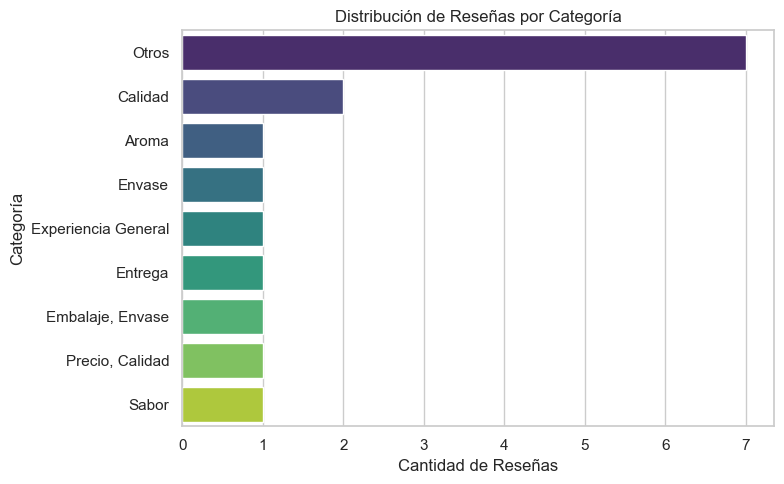

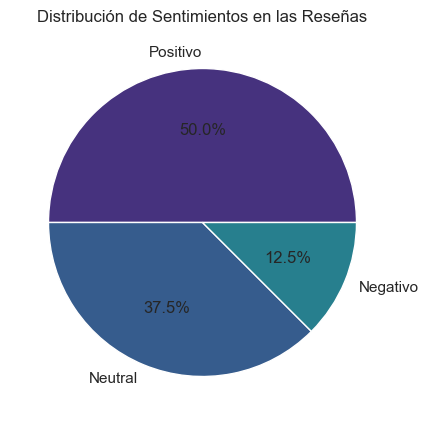

C:\Users\herna\AppData\Local\Temp\ipykernel_18116\969665554.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=palabras_clave, palette="viridis")


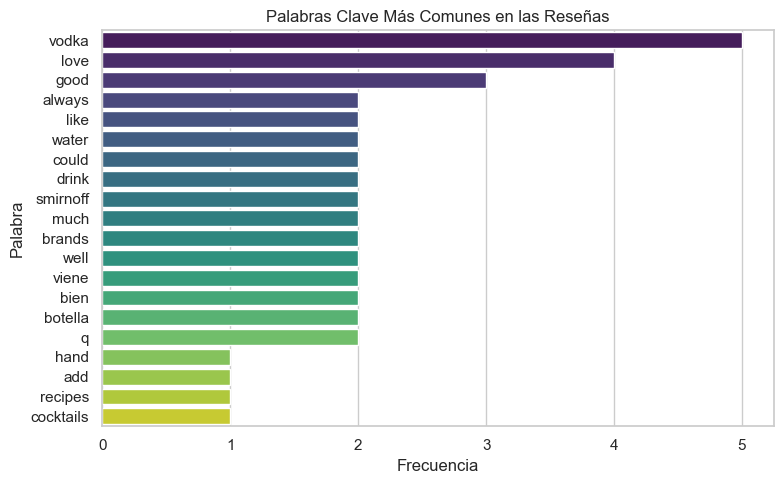

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Cargar el archivo CSV con las categorías asignadas
file_path = 'amazon_reviews_Smirnoff-Vodka_categorias.csv'
df = pd.read_csv(file_path)

# Gráfico de barras de reseñas por categoría
plt.figure(figsize=(8, 5))
agrupadas_por_categoria = df['Categoría'].value_counts()
sns.barplot(x=agrupadas_por_categoria.values, y=agrupadas_por_categoria.index, palette="viridis")
plt.title("Distribución de Reseñas por Categoría")
plt.xlabel("Cantidad de Reseñas")
plt.ylabel("Categoría")
plt.tight_layout()
plt.savefig('amazon_reviews_categorias.png')
plt.show()

# Gráfico circular de análisis de sentimientos
sentimientos = pd.read_csv('amazon_reviews_Smirnoff-Vodka_sentimientos.csv')
sentimiento_counts = sentimientos['Sentimiento'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(sentimiento_counts, labels=sentimiento_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
plt.title("Distribución de Sentimientos en las Reseñas")
plt.savefig('amazon_reviews_sentimientos.png')
plt.show()

# Gráfico de palabras clave más comunes
palabras_clave = pd.read_csv('amazon_reviews_Smirnoff-Vodka_palabras_clave.csv')

plt.figure(figsize=(8, 5))
sns.barplot(x='Frecuencia', y='Palabra', data=palabras_clave, palette="viridis")
plt.title("Palabras Clave Más Comunes en las Reseñas")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.savefig('amazon_reviews_palabras_clave.png')
plt.show()


⭕ Graficos de Word Cloud

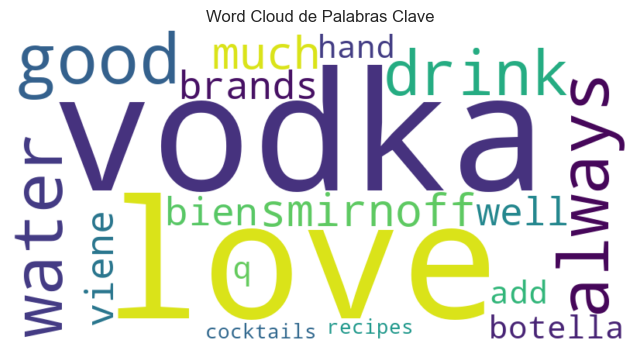

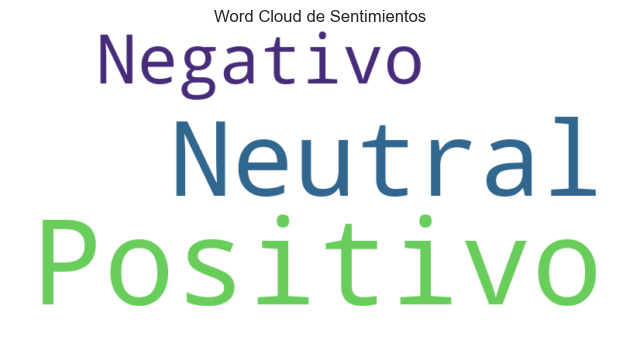

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el archivo CSV de palabras clave
palabras_clave = pd.read_csv('amazon_reviews_Smirnoff-Vodka_palabras_clave.csv')

# Generar Word Cloud para palabras clave
texto_palabras_clave = ' '.join(palabras_clave['Palabra'].values)
wordcloud_palabras_clave = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_palabras_clave)

# Mostrar y guardar Word Cloud para palabras clave
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_palabras_clave, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Palabras Clave")
plt.savefig('amazon_reviews_palabras_clave_wordcloud.png')
plt.show()

# Cargar el archivo CSV de sentimientos
sentimientos = pd.read_csv('amazon_reviews_Smirnoff-Vodka_sentimientos.csv')

# Generar Word Cloud para sentimientos
texto_sentimientos = ' '.join(sentimientos['Sentimiento'].values)
wordcloud_sentimientos = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_sentimientos)

# Mostrar y guardar Word Cloud para sentimientos
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_sentimientos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Sentimientos")
plt.savefig('amazon_reviews_sentimientos_wordcloud.png')
plt.show()


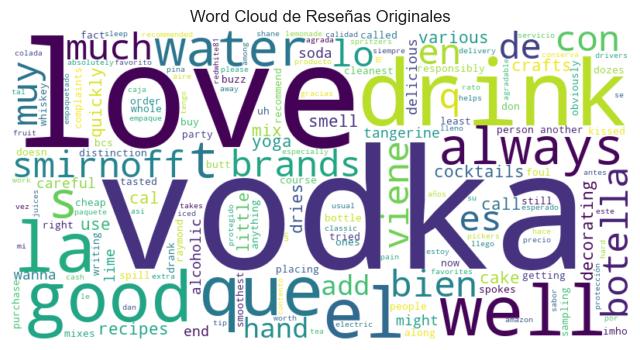

In [30]:
# Combinar todas las reseñas en un solo texto
texto_resenas = ' '.join(df['Review'].dropna()).lower()

# Generar Word Cloud
wordcloud_resenas = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_resenas)

# Mostrar y guardar Word Cloud para reseñas
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_resenas, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Reseñas Originales")
plt.savefig('amazon_reviews_resenas_wordcloud.png')
plt.show()


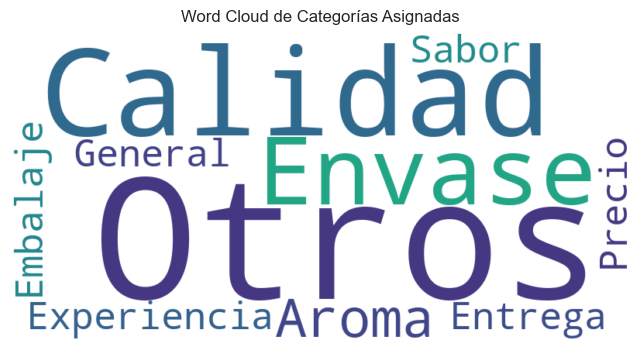

In [31]:
# Combinar todas las categorías en un solo texto
texto_categorias = ' '.join(df['Categoría'].dropna())

# Generar Word Cloud
wordcloud_categorias = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_categorias)

# Mostrar y guardar Word Cloud para categorías
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_categorias, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Categorías Asignadas")
plt.savefig('amazon_reviews_categorias_wordcloud.png')
plt.show()


### 🕵️‍♂️👩‍💻 Analisis de Jack Daniels

⭕Analisis de Sentimientos

In [33]:
import pandas as pd
from textblob import TextBlob

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Función para obtener el sentimiento de una reseña
def obtener_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar el análisis de sentimiento a cada reseña
df['Sentimiento'] = df['Review'].apply(obtener_sentimiento)

# Contar la cantidad de reseñas por tipo de sentimiento
sentimiento_counts = df['Sentimiento'].value_counts()
print(sentimiento_counts)

# Guardar el DataFrame con los sentimientos en un nuevo archivo CSV
df.to_csv('jack_daniels_reviews_sentimientos.csv', index=False)

print("Análisis de sentimientos completado y guardado en 'jack_daniels_reviews_sentimientos.csv'")


Sentimiento
Positivo    13
Neutral      8
Negativo     2
Name: count, dtype: int64
Análisis de sentimientos completado y guardado en 'jack_daniels_reviews_sentimientos.csv'


⭕Analisis de temas y topicos

In [34]:
import pandas as pd
import re

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Definir las categorías y palabras clave
categorias = {
    'Sabor': ['sabor', 'taste', 'flavor', 'gosto'],
    'Precio': ['precio', 'price', 'preço'],
    'Entrega': ['entrega', 'delivery', 'envío'],
    'Calidad': ['calidad', 'quality', 'qualidade', 'smooth', 'good'],
    'Embalaje': ['embalaje', 'packaging', 'pack', 'bolsa', 'caja', 'box'],
    'Servicio al Cliente': ['servicio al cliente', 'customer service', 'serviço ao cliente'],
    'Aroma': ['aroma', 'smell', 'fragancia', 'fragrance'],
    'Experiencia General': ['experiencia', 'overall', 'general', 'experience', 'jack', 'JD', 'classic'],
    'Envase': ['botella', 'tapa', 'envase', 'lacre', 'bottle', 'cap'],
    'Marca': ['marca', 'brand', 'Jack', 'JD']
}

# Función para categorizar las reseñas
def categorizar_resena(resena):
    categorias_asignadas = []
    for categoria, palabras in categorias.items():
        for palabra in palabras:
            if re.search(r'\b' + re.escape(palabra) + r'\b', resena.lower()):
                categorias_asignadas.append(categoria)
                break
    return ', '.join(categorias_asignadas) if categorias_asignadas else 'Otros'

# Aplicar la categorización a cada reseña
df['Categoría'] = df['Review'].apply(categorizar_resena)

# Resumen de reseñas por categoría
resumen_por_categoria = df['Categoría'].value_counts()
print(resumen_por_categoria)

# Guardar el DataFrame con las categorías en un nuevo archivo CSV
df.to_csv('jack_daniels_reviews_categorias.csv', index=False)

print("Análisis de temas y tópicos completado y guardado en 'jack_daniels_reviews_categorias.csv'")


Categoría
Calidad                        6
Otros                          5
Experiencia General            4
Precio, Experiencia General    2
Entrega                        2
Precio                         2
Sabor, Calidad                 1
Precio, Calidad                1
Name: count, dtype: int64
Análisis de temas y tópicos completado y guardado en 'jack_daniels_reviews_categorias.csv'


⭕Analisis de palabras claves

In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

# Descargar las stopwords de NLTK si no lo has hecho antes
nltk.download('stopwords')

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Combinar todas las reseñas en un solo texto
texto_completo = ' '.join(df['Review'].dropna()).lower()

# Quitar puntuación del texto
texto_completo = texto_completo.translate(str.maketrans('', '', string.punctuation))

# Dividir el texto en palabras
palabras = texto_completo.split()

# Eliminar las stopwords (palabras comunes)
stop_words = set(stopwords.words('english') + stopwords.words('spanish') + stopwords.words('portuguese'))
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

# Contar la frecuencia de cada palabra
contador_palabras = Counter(palabras_filtradas)

# Obtener las palabras más comunes
palabras_comunes = contador_palabras.most_common(20)  # Cambia el número para obtener más o menos palabras

# Mostrar las palabras más comunes
print("Las palabras más comunes son:")
for palabra, frecuencia in palabras_comunes:
    print(f"{palabra}: {frecuencia}")

# Guardar los resultados en un archivo CSV
df_palabras_comunes = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])
df_palabras_comunes.to_csv('jack_daniels_reviews_palabras_clave.csv', index=False)

print("Análisis de palabras clave completado y guardado en 'jack_daniels_reviews_palabras_clave.csv'")


Las palabras más comunes son:
great: 8
jack: 7
think: 4
don’t: 4
price: 4
home: 4
bar: 4
good: 4
say: 4
hate: 4
got: 4
daniels: 3
love: 3
jd: 3
product: 2
tastes: 2
nice: 2
smooth: 2
spilled: 2
slipped: 2
Análisis de palabras clave completado y guardado en 'jack_daniels_reviews_palabras_clave.csv'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


⭕Analisis de opiniones repetidas

In [36]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'jack_daniels_reviews.csv'
df = pd.read_csv(file_path)

# Contar las opiniones repetidas
repetidas = df['Review'].value_counts()

# Filtrar y mostrar solo las opiniones que están repetidas (aparecen más de una vez)
opiniones_repetidas = repetidas[repetidas > 1]
print("Opiniones repetidas encontradas:")
print(opiniones_repetidas)

# Guardar las opiniones repetidas en un nuevo archivo CSV
opiniones_repetidas_df = opiniones_repetidas.reset_index()
opiniones_repetidas_df.columns = ['Review', 'Frecuencia']
opiniones_repetidas_df.to_csv('jack_daniels_reviews_opiniones_repetidas.csv', index=False)

print("Análisis de opiniones repetidas completado y guardado en 'jack_daniels_reviews_opiniones_repetidas.csv'")


Opiniones repetidas encontradas:
Review
Great product, tastes great, nice and smooth, but I think I spilled some and slipped cleaning it up. I woke up in my neighbors toy hauler covered in Vaseline and don’t remember a thing?????    2
Probably the best price around for this American classic. If you don’t have Jack Daniels in your home bar then your home bar is not complete.                                                    2
Delivery professional and on time.                                                                                                                                                               2
Great sour mash. Good on a budget too.                                                                                                                                                           2
It is very good, but I think I like the honey one more.                                                                                                                             

⭕Representaciones Graficas

C:\Users\herna\AppData\Local\Temp\ipykernel_18116\2799125137.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agrupadas_por_categoria.values, y=agrupadas_por_categoria.index, palette="viridis")


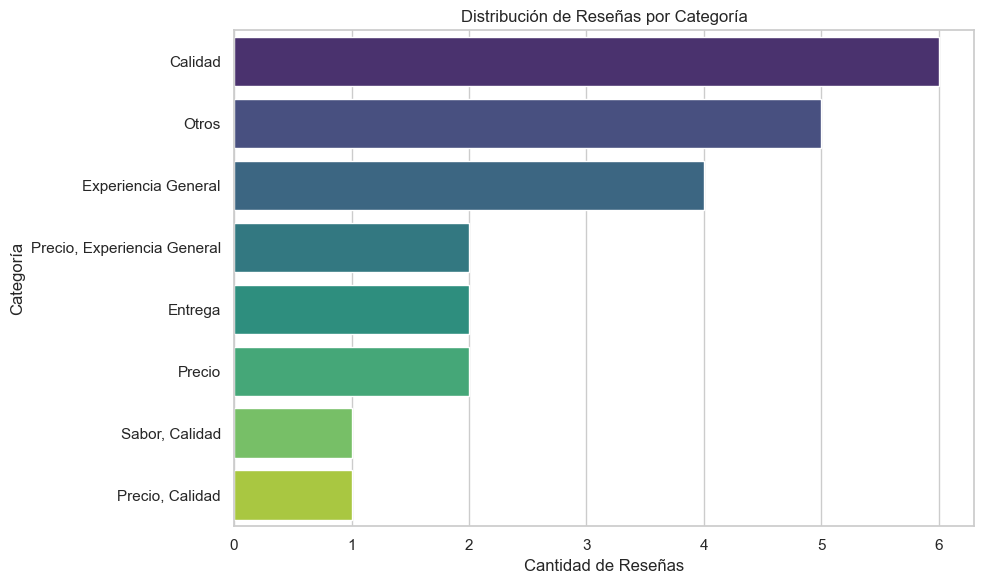

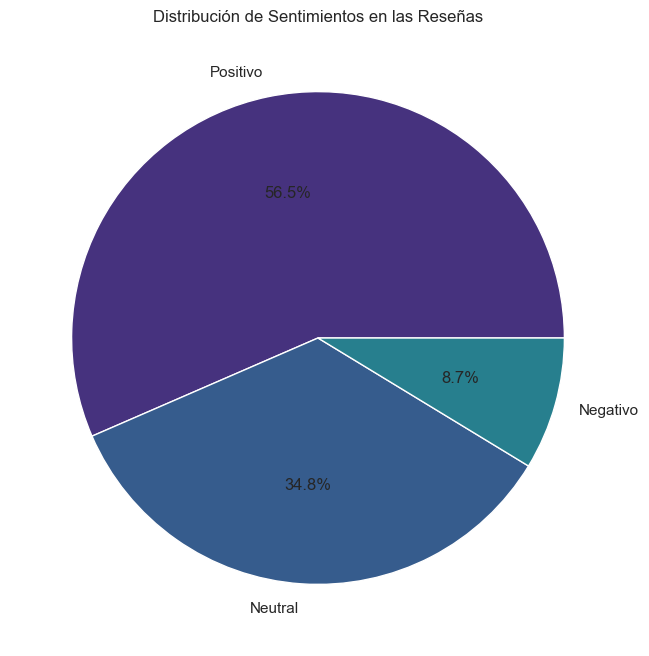

C:\Users\herna\AppData\Local\Temp\ipykernel_18116\2799125137.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras_clave, palette="viridis")


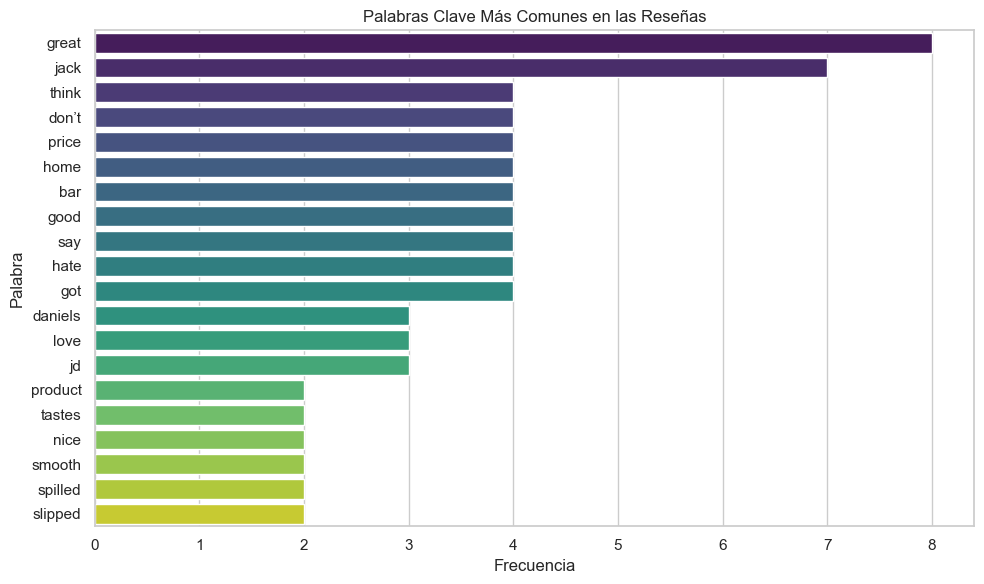

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico 1: Distribución de Reseñas por Categoría
file_path_categorias = 'jack_daniels_reviews_categorias.csv'
df_categorias = pd.read_csv(file_path_categorias)
agrupadas_por_categoria = df_categorias['Categoría'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=agrupadas_por_categoria.values, y=agrupadas_por_categoria.index, palette="viridis")
plt.title("Distribución de Reseñas por Categoría")
plt.xlabel("Cantidad de Reseñas")
plt.ylabel("Categoría")
plt.tight_layout()
plt.savefig('jack_daniels_categorias.png')
plt.show()

# Gráfico 2: Distribución de Sentimientos
file_path_sentimientos = 'jack_daniels_reviews_sentimientos.csv'
df_sentimientos = pd.read_csv(file_path_sentimientos)
sentimiento_counts = df_sentimientos['Sentimiento'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentimiento_counts, labels=sentimiento_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"))
plt.title("Distribución de Sentimientos en las Reseñas")
plt.savefig('jack_daniels_sentimientos.png')
plt.show()

# Gráfico 3: Palabras Clave Más Comunes
file_path_palabras_clave = 'jack_daniels_reviews_palabras_clave.csv'
df_palabras_clave = pd.read_csv(file_path_palabras_clave)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras_clave, palette="viridis")
plt.title("Palabras Clave Más Comunes en las Reseñas")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.tight_layout()
plt.savefig('jack_daniels_palabras_clave.png')
plt.show()


⭕ Analisis a trasves de Word Cloud

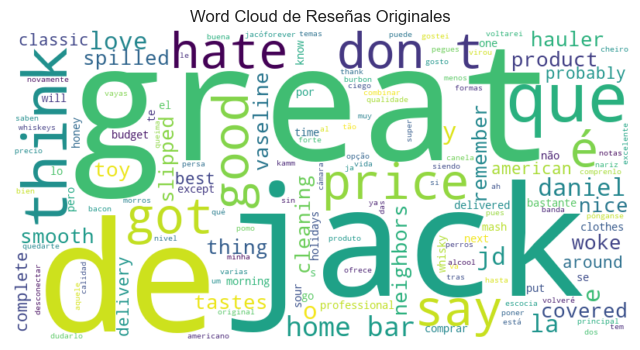

In [49]:

# Cargar el archivo CSV de reseñas
df_resenas = pd.read_csv('jack_daniels_reviews.csv')

# Combinar todas las reseñas en un solo texto
texto_resenas = ' '.join(df_resenas['Review'].dropna()).lower()

# Generar Word Cloud
wordcloud_resenas = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_resenas)

# Mostrar y guardar Word Cloud para reseñas
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_resenas, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Reseñas Originales")
plt.savefig('jack_daniels_resenas_wordcloud.png')
plt.show()


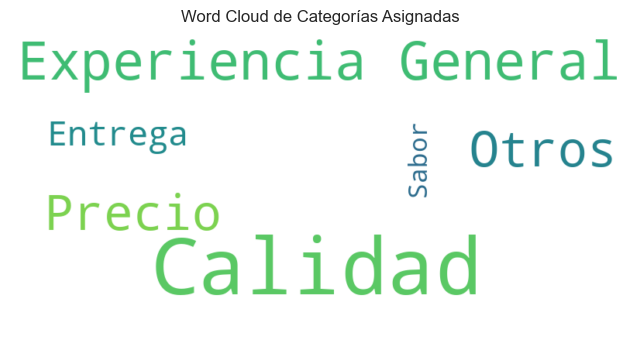

In [48]:

# Cargar el archivo CSV de categorías
df_categorias = pd.read_csv('jack_daniels_reviews_categorias.csv')

# Combinar todas las categorías en un solo texto
texto_categorias = ' '.join(df_categorias['Categoría'].dropna())

# Generar Word Cloud
wordcloud_categorias = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_categorias)

# Mostrar y guardar Word Cloud para categorías
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_categorias, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Categorías Asignadas")
plt.savefig('jack_daniels_categorias_wordcloud.png')
plt.show()


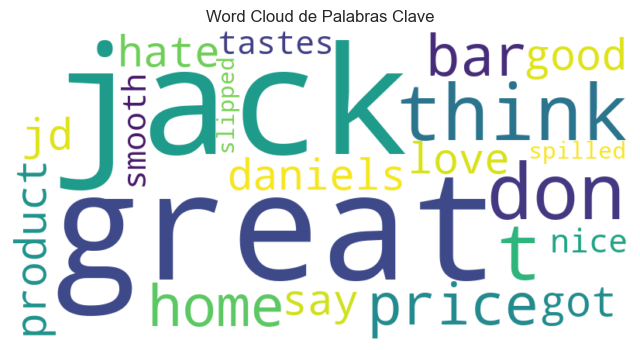

In [47]:
# Cargar el archivo CSV de palabras clave
df_palabras_clave = pd.read_csv('jack_daniels_reviews_palabras_clave.csv')

# Generar Word Cloud para palabras clave
texto_palabras_clave = ' '.join(df_palabras_clave['Palabra'].values)
wordcloud_palabras_clave = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_palabras_clave)

# Mostrar y guardar Word Cloud para palabras clave
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_palabras_clave, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Palabras Clave")
plt.savefig('jack_daniels_palabras_clave_wordcloud.png')
plt.show()


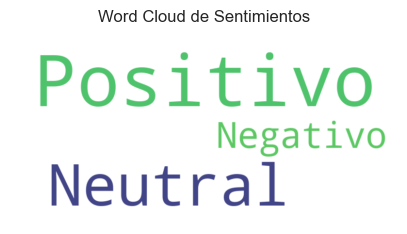

In [50]:

# Cargar el archivo CSV de sentimientos
df_sentimientos = pd.read_csv('jack_daniels_reviews_sentimientos.csv')

# Generar Word Cloud para sentimientos
texto_sentimientos = ' '.join(df_sentimientos['Sentimiento'].values)
wordcloud_sentimientos = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto_sentimientos)

# Mostrar y guardar Word Cloud para sentimientos
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud_sentimientos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de Sentimientos")
plt.savefig('jack_daniels_sentimientos_wordcloud.png')
plt.show()


### 👩‍💻🕵️‍♂️Importancia de hacer Web Scraping

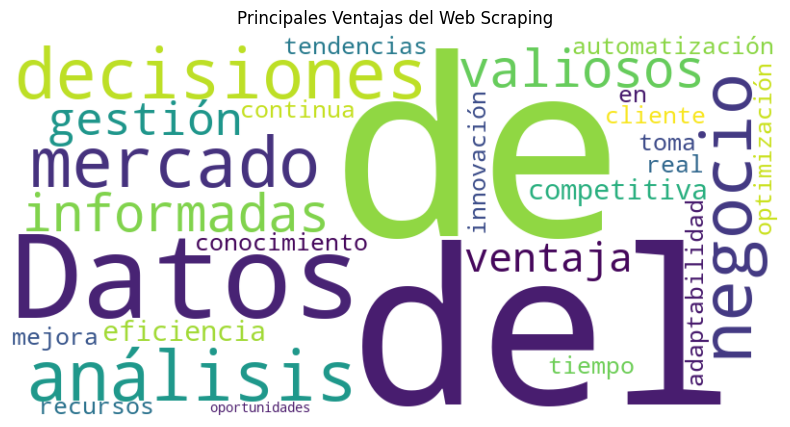

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto enfocado en las principales ventajas del web scraping
texto = """
Datos, datos valiosos, decisiones informadas, gestión del negocio, ventaja competitiva,
análisis de mercado, eficiencia, automatización, tendencias del mercado, adaptabilidad,
optimización de recursos, conocimiento del cliente, toma de decisiones, 
análisis en tiempo real, mejora continua, innovación, oportunidades de negocio.
"""

# Generar la Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto)

# Mostrar y guardar la Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Principales Ventajas del Web Scraping")
plt.savefig('ventajas_web_scraping_wordcloud.png')
plt.show()
